In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv("diabetes.csv")

In [8]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


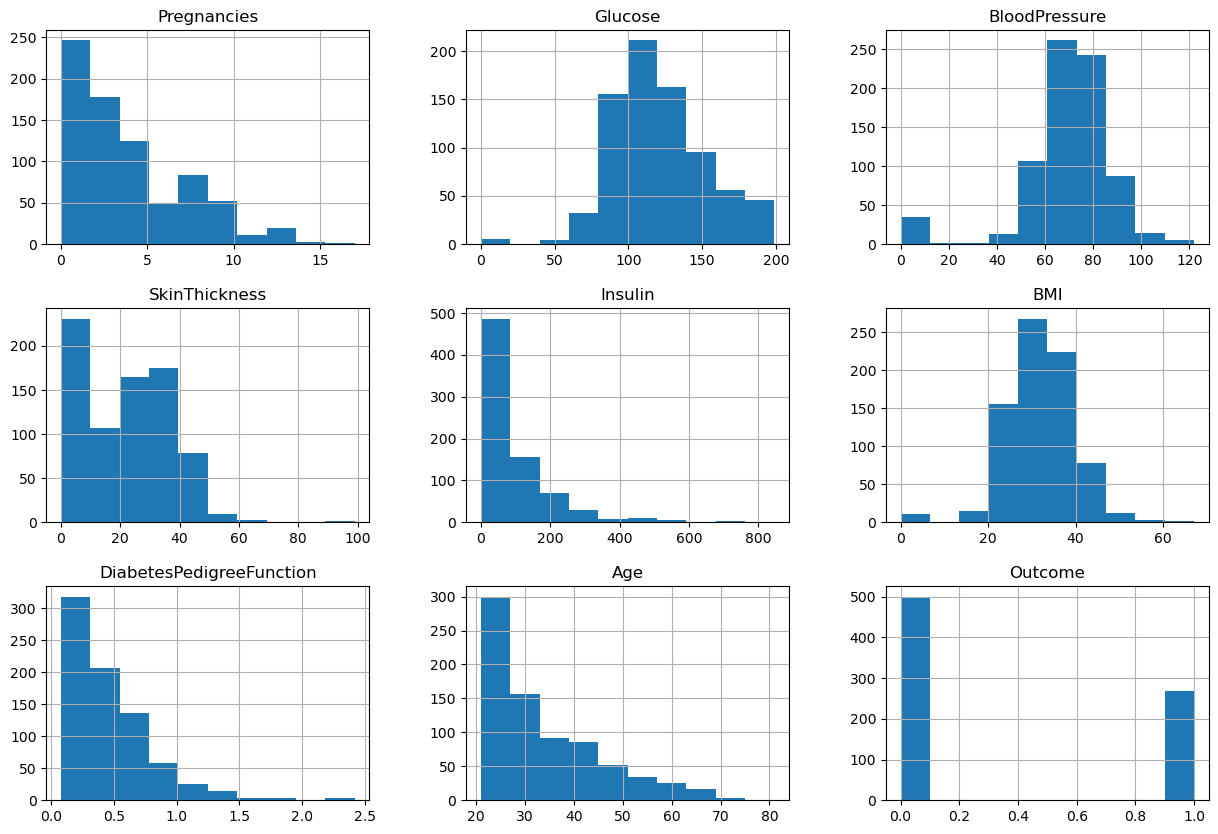

In [11]:
df.hist(figsize=(15,10))
plt.show()

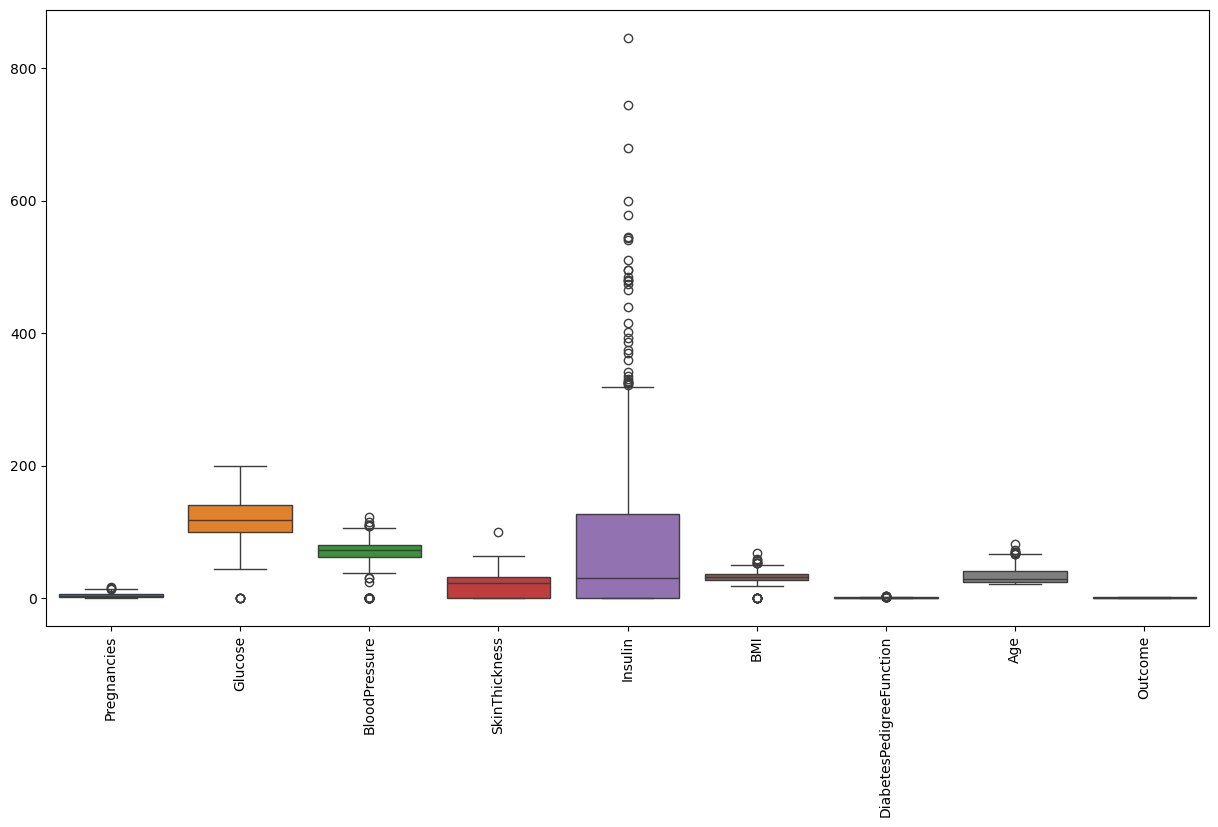

In [13]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

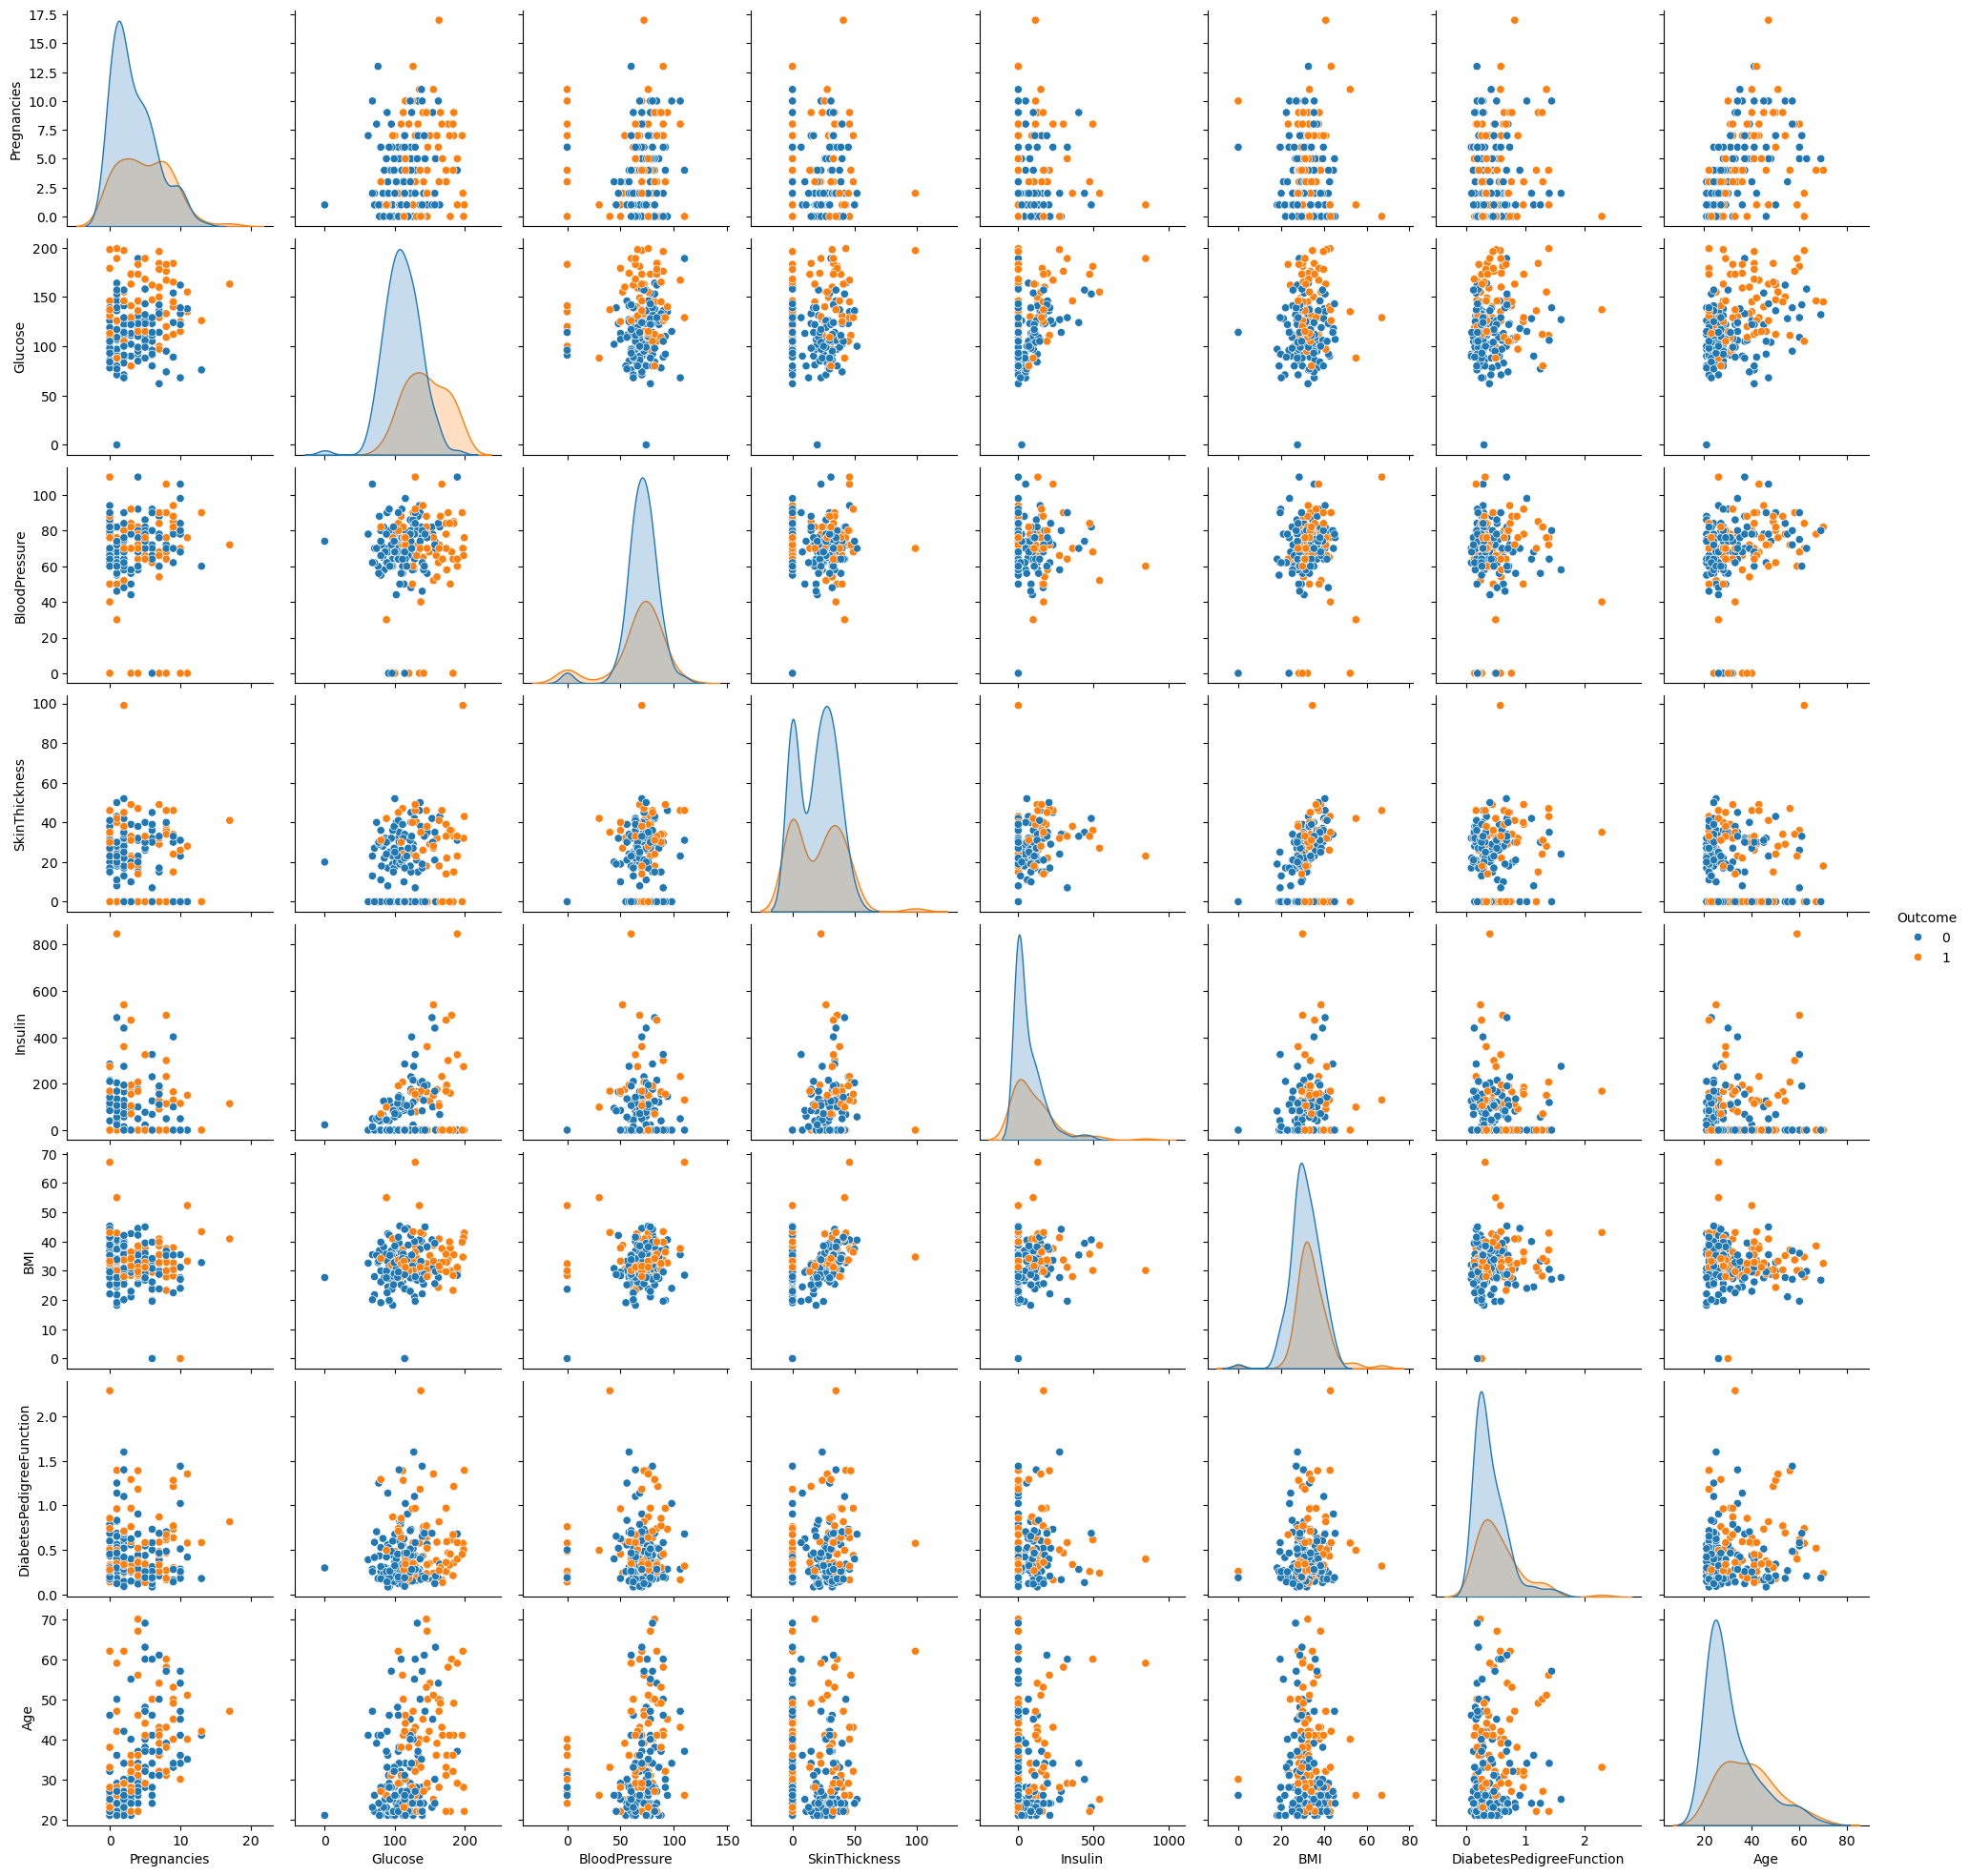

In [14]:
sns.pairplot(df.sample(200), hue="Outcome")
plt.show()

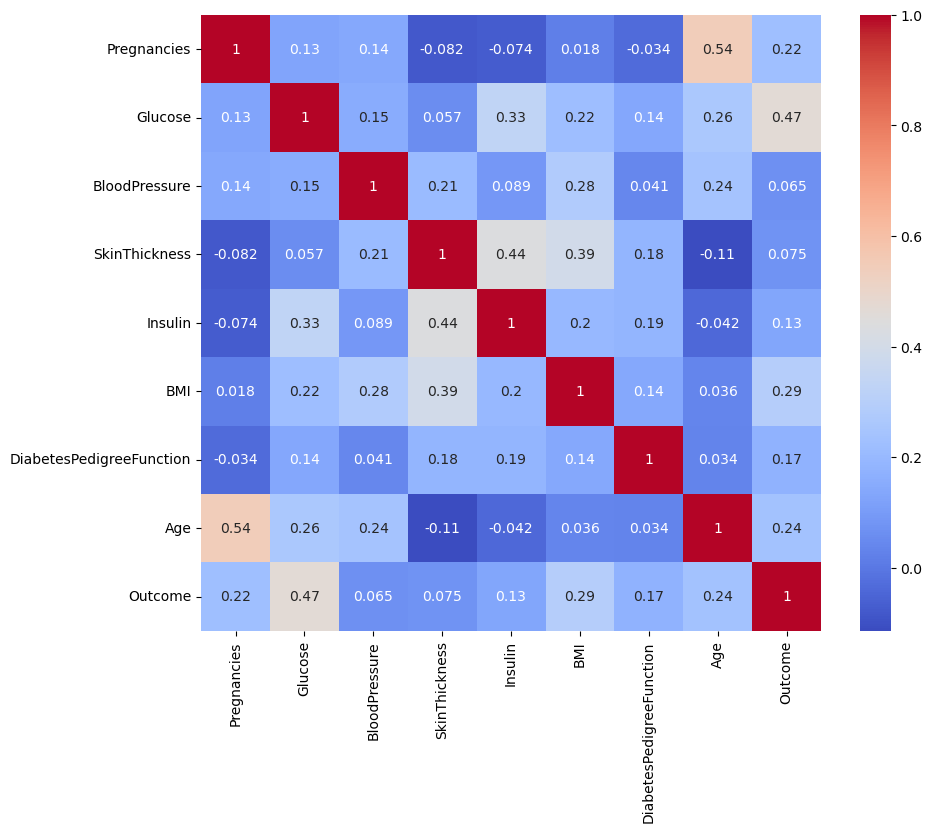

In [15]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

In [17]:
cols_with_zero = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

for col in cols_with_zero:
    df[col] = df[col].replace(0, np.nan)

df.fillna(df.median(), inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [21]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [25]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [26]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, classification_report
)


In [27]:
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:,1]


In [29]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

print("Classification Report:\n")
print(classification_report(y_test, y_pred))

Accuracy: 0.7077922077922078
Precision: 0.6
Recall: 0.5
F1 Score: 0.5454545454545454
ROC-AUC: 0.812962962962963
Classification Report:

              precision    recall  f1-score   support

           0       0.75      0.82      0.78       100
           1       0.60      0.50      0.55        54

    accuracy                           0.71       154
   macro avg       0.68      0.66      0.67       154
weighted avg       0.70      0.71      0.70       154



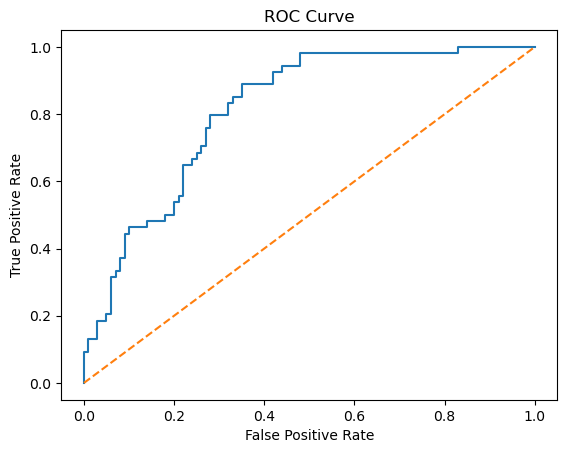

In [33]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

In [35]:
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

In [36]:
coef_df

,Feature,Coefficient
1,Glucose,1.182511
5,BMI,0.688735
0,Pregnancies,0.377502
6,DiabetesPedigreeFunction,0.233386
7,Age,0.147798
3,SkinThickness,0.028225
2,BloodPressure,-0.044066
4,Insulin,-0.066157


In [38]:
import joblib

joblib.dump(model, "logistic_model.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [54]:
import streamlit as st
import numpy as np
import joblib

In [70]:
model = joblib.load("logistic_model.pkl")
scaler = joblib.load("scaler.pkl")

st.set_page_config(page_title="Diabetes Prediction App")

st.title("🩺 Diabetes Prediction App")
st.write("Logistic Regression Model Deployment using Streamlit")

st.divider()

2025-12-17 15:43:38.678 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-17 15:43:38.680 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-17 15:43:38.681 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-17 15:43:38.682 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-17 15:43:38.684 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-17 15:43:38.685 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-17 15:43:38.686 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [71]:
preg = st.number_input("Pregnancies", 0, 20)
glucose = st.number_input("Glucose", 0, 200)
bp = st.number_input("Blood Pressure", 0, 150)
skin = st.number_input("Skin Thickness", 0, 100)
insulin = st.number_input("Insulin", 0, 900)
bmi = st.number_input("BMI", 0.0, 70.0)
dpf = st.number_input("Diabetes Pedigree Function", 0.0, 3.0)
age = st.number_input("Age", 1, 100)

2025-12-17 15:44:01.247 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-17 15:44:01.249 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-17 15:44:01.250 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-17 15:44:01.251 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-17 15:44:01.253 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-17 15:44:01.253 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-17 15:44:01.254 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-17 15:44:01.255 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [72]:
if st.button("Predict"):
    input_data = np.array([[preg, glucose, bp, skin, insulin, bmi, dpf, age]])
    input_scaled = scaler.transform(input_data)

    prediction = model.predict(input_scaled)[0]
    probability = model.predict_proba(input_scaled)[0][1]

    if prediction == 1:
        st.error(f"Diabetes Detected\n\nProbability: {probability:.2f}")
    else:
        st.success(f" No Diabetes\n\nProbability: {probability:.2f}")

2025-12-17 15:44:42.173 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-17 15:44:42.175 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-17 15:44:42.176 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-17 15:44:42.177 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-17 15:44:42.178 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [68]:
  if prediction == 1:
        st.error(f"Diabetes Detected (Probability: {probability:.2f})")
  else:
        st.success(f"No Diabetes (Probability: {probability:.2f})")

NameError: name 'prediction' is not defined

In [74]:
pip install streamlit scikit-learn joblib numpy pandas

Note: you may need to restart the kernel to use updated packages.


In [75]:
streamlit run app.py

SyntaxError: invalid syntax (3737097518.py, line 1)